In [5]:
# Criar diretório
!mkdir -p /content/datasets/coco128

# Baixar o dataset COCO128 completo
!wget -q https://github.com/ultralytics/assets/releases/download/v0.0.0/coco128.zip -O /content/datasets/coco128/coco128.zip

In [7]:
# Extrair o dataset
!unzip -q /content/datasets/coco128/coco128.zip -d /content/datasets/coco128/

replace /content/datasets/coco128/coco128/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/datasets/coco128/coco128/images/train2017/000000000612.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/datasets/coco128/coco128/images/train2017/000000000404.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/datasets/coco128/coco128/images/train2017/000000000438.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/datasets/coco128/coco128/images/train2017/000000000389.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/datasets/coco128/coco128/images/train2017/000000000564.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/datasets/coco128/coco128/images/train2017/000000000149.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/datasets/coco128/coco128/images/train2017/000000000605.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [13]:
# Criar o arquivo data.yaml no diretório coco128
data_yaml = """train: /content/datasets/coco128/coco128/images/train2017/
val: /content/datasets/coco128/coco128/images/train2017/
nc: 80
names: ["person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat", "traffic light",
        "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow",
        "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee",
        "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
        "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple",
        "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch",
        "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone",
        "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear",
        "hair drier", "toothbrush"]
"""

# Salvar o arquivo data.yaml no diretório coco128
with open("/content/datasets/coco128/data.yaml", "w") as f:
    f.write(data_yaml)

print("Arquivo data.yaml criado com sucesso em /content/datasets/coco128/!")

# Instalar YOLOv8
!pip install ultralytics

# Importar bibliotecas necessárias
import torch
from ultralytics import YOLO

# Verificar se há GPU disponível e definir o dispositivo corretamente
if torch.cuda.is_available():
    device = "cuda:0"  # Força o uso da GPU
else:
    device = "cpu"  # Usa CPU se a GPU não estiver disponível

print(f"Usando dispositivo: {device}")

Arquivo data.yaml criado com sucesso em /content/datasets/coco128/!
Usando dispositivo: cpu


Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/coco128/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

100%|██████████| 755k/755k [00:00<00:00, 10.4MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/datasets/coco128/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 351.66it/s]

train: New cache created: /content/datasets/coco128/coco128/labels/train2017.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/coco128/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train4
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      1.122      1.528      1.214        212        640: 100%|██████████| 8/8 [02:06<00:00, 15.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:47<00:00, 11.86s/it]


                   all        128        929      0.665      0.521      0.615      0.455

1 epochs completed in 0.053 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:33<00:00,  8.33s/it]


                   all        128        929      0.663      0.522      0.616      0.456
                person         61        254      0.816      0.669      0.768       0.54
               bicycle          3          6      0.581      0.333      0.317      0.277
                   car         12         46       0.84      0.217      0.271      0.168
            motorcycle          4          5      0.679      0.853      0.881      0.708
              airplane          5          6      0.821      0.773      0.913      0.685
                   bus          5          7      0.618      0.714      0.727      0.694
                 train          3          3      0.548      0.667      0.705      0.581
                 truck          5         12          1      0.332      0.481      0.301
                  boat          2          6      0.276      0.167      0.363      0.237
         traffic light          4         14      0.735      0.201      0.202      0.139
             stop sig

val: Scanning /content/datasets/coco128/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:26<00:00,  3.28s/it]


                   all        128        929      0.662      0.526      0.613      0.452
                person         61        254      0.813      0.665      0.768      0.541
               bicycle          3          6       0.55      0.333      0.315      0.275
                   car         12         46      0.825      0.217      0.271      0.168
            motorcycle          4          5      0.682      0.864      0.881      0.708
              airplane          5          6      0.822      0.779      0.913      0.685
                   bus          5          7      0.605      0.714      0.727      0.694
                 train          3          3      0.544      0.667      0.706      0.582
                 truck          5         12          1      0.368      0.472      0.272
                  boat          2          6      0.231      0.167      0.325      0.121
         traffic light          4         14      0.726      0.193      0.202      0.139
             stop sig

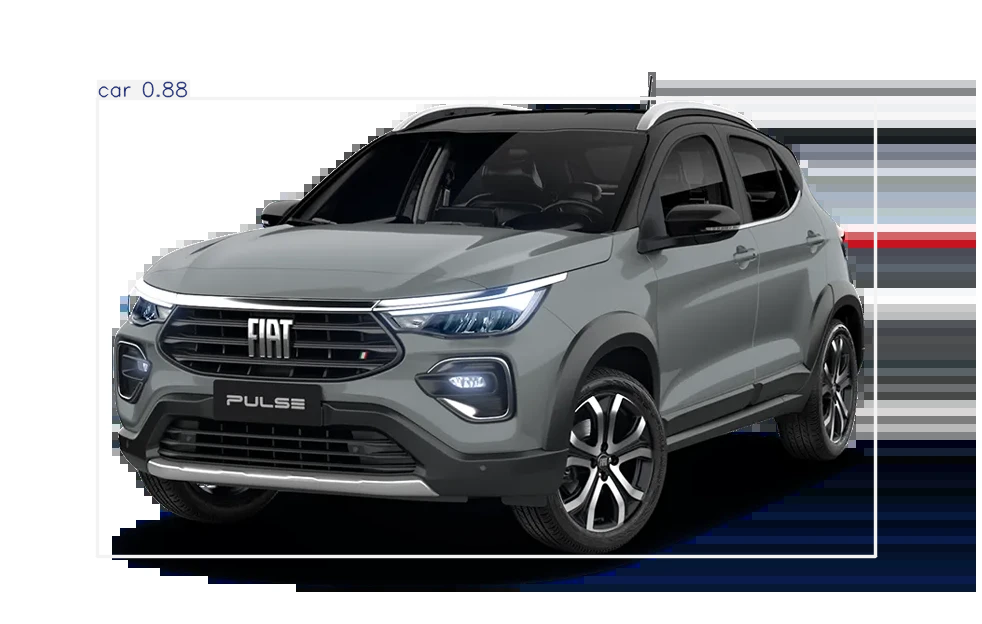

In [14]:
# Carregar modelo YOLOv8 pré-treinado
model = YOLO("yolov8n.pt")

# Treinar o modelo com o dataset COCO128
model.train(data="/content/datasets/coco128/data.yaml", epochs=1, batch=16, imgsz=640, device=device)

# Avaliação do modelo treinado no conjunto de validação
metrics = model.val()

# Exibir métricas importantes
print(f"mAP50: {metrics.box.map50:.4f}")  # Precisão média para IoU de 50%
print(f"mAP50-95: {metrics.box.map:.4f}")  # Precisão média para IoU de 50 a 95%

# Testar o modelo em uma nova imagem
results = model("pulse.webp", save=True, conf=0.5)
results = model("fiat-pulse-67.jpg", save=True, conf=0.5)
# Exibir as detecções
for result in results:
    result.show()

In [15]:
# Avaliação do modelo treinado no conjunto de validação
metrics = model.val()

# Exibir métricas importantes
print(f"mAP50: {metrics.box.map50:.4f}")  # Precisão média para IoU de 50%
print(f"mAP50-95: {metrics.box.map:.4f}")  # Precisão média para IoU de 50 a 95%

Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/datasets/coco128/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:25<00:00,  3.24s/it]


                   all        128        929      0.662      0.526      0.613      0.452
                person         61        254      0.813      0.665      0.768      0.541
               bicycle          3          6       0.55      0.333      0.315      0.275
                   car         12         46      0.825      0.217      0.271      0.168
            motorcycle          4          5      0.682      0.864      0.881      0.708
              airplane          5          6      0.822      0.779      0.913      0.685
                   bus          5          7      0.605      0.714      0.727      0.694
                 train          3          3      0.544      0.667      0.706      0.582
                 truck          5         12          1      0.368      0.472      0.272
                  boat          2          6      0.231      0.167      0.325      0.121
         traffic light          4         14      0.726      0.193      0.202      0.139
             stop sig


image 1/1 /content/pulse.webp: 416x640 1 car, 202.4ms
Speed: 9.0ms preprocess, 202.4ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/train45

image 1/1 /content/fiat-pulse-67.jpg: 352x640 1 car, 130.5ms
Speed: 2.2ms preprocess, 130.5ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/train46


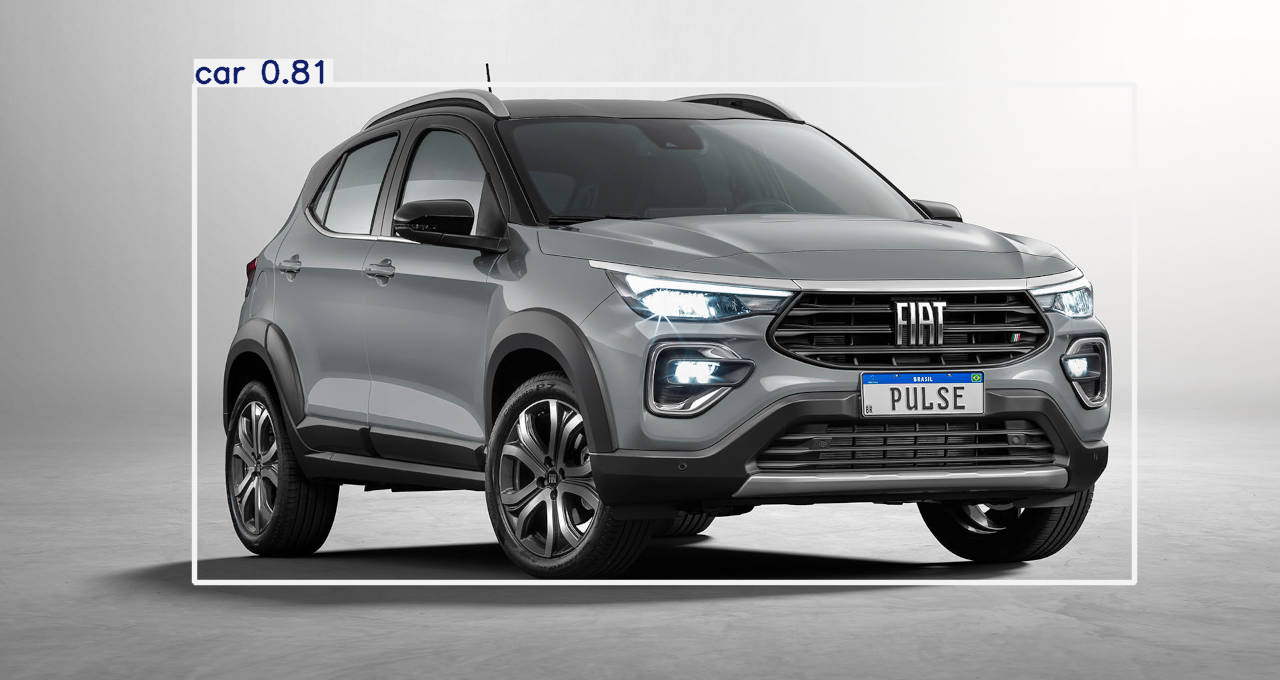

In [16]:
# Testar o modelo em uma nova imagem
results = model("pulse.webp", save=True, conf=0.5)
results = model("fiat-pulse-67.jpg", save=True, conf=0.5)
# Exibir as detecções
for result in results:
    result.show()